# Berlin Trees Visualizations

## Notebook Setup
1. Importing relevant libraries
2. Importing the Dataset
3. inspect data
4. Checking Data types

In [1]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [2]:
#pip install plotly==5.8.2


In [3]:
#import plotly.express as px

In [4]:
df = pd.read_csv('berlin_trees_data.csv')

/Users/anna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

df.head()

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf


In [6]:
df.dtypes

Unnamed: 0                  int64
ID                         object
Baum Nr.                   object
Objektnr.                  object
Objektname                 object
Baumart deutsch            object
Baumart botanisch          object
Gattung botanisch          object
Straße                     object
Hausnr.                    object
Hausnr. Zusatz             object
Pflanzjahr                  int64
Standalter                  int64
Krone Durchmesser in m    float64
Stamm Umfang in cm        float64
Baumhöhe in m             float64
Bezirk                     object
dtype: object

In [7]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Baum Nr.', 'Objektnr.', 'Objektname',
       'Baumart deutsch', 'Baumart botanisch', 'Gattung botanisch', 'Straße',
       'Hausnr.', 'Hausnr. Zusatz', 'Pflanzjahr', 'Standalter',
       'Krone Durchmesser in m', 'Stamm Umfang in cm', 'Baumhöhe in m',
       'Bezirk'],
      dtype='object')


# Top 10 Trees per District Visualization
1. Check for Districts
2. Group by District
3. Make groups
4. Filter for top 10 trees

In [8]:
print(df['Bezirk'].unique())

['Charlottenburg-Wilmersdorf' 'Friedrichshain-Kreuzberg' 'Lichtenberg'
 'Marzahn-Hellersdorf' 'Neukölln' 'Pankow' 'Reinickendorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg' 'Treptow-Köpenick']


In [9]:
### Splitting Groups per district

df_district = df.groupby(['Bezirk'])

In [10]:
### Defining groups
df_neukoelln = df_district.get_group('Neukölln')

In [11]:
### Filter out top 10 District trees

df_trees_in_neukoelln = df_neukoelln['Baumart deutsch'].value_counts()

In [12]:
type(df_trees_in_neukoelln)


pandas.core.series.Series

<AxesSubplot:title={'center':'Top Ten Trees in Neukölln'}>

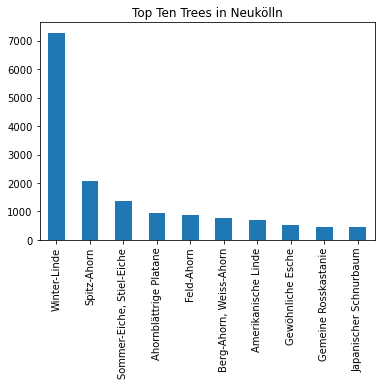

In [13]:
df_trees_in_neukoelln.head(10).plot.bar(title="Top Ten Trees in Neukölln")

# Top 10 Strees with most trees per District Visualization


In [14]:
df_streets_in_neukoelln = df_charlottenburg['Straße'].value_counts()

NameError: name 'df_charlottenburg' is not defined

In [ ]:
df_streets_in_neukoelln.head(10).plot.bar(title="Streets with most Trees in Neukölln")

## Top Trees
1. oldest
2. highest

In [15]:
df_neukoelln['Baumhöhe in m'].idxmax

<bound method Series.idxmax of 136615    16.0
136616    17.0
136617    16.0
136618    16.0
136619    17.0
          ... 
157223     NaN
157224     NaN
157225     NaN
157226     NaN
157227     NaN
Name: Baumhöhe in m, Length: 20613, dtype: float64>

In [17]:
### Heighest Tree
max_height_in_neukoelln = df_neukoelln['Baumhöhe in m'].idxmax()
heighest_tree_in_neukoelln = df_neukoelln.loc[[max_height_in_neukoelln]]
print(heighest_tree_in_neukoelln)

        Unnamed: 0                 ID Baum Nr. Objektnr. Objektname  \
138726      138726  00008100:000bc137       30      6094    Dammweg   

                  Baumart deutsch Baumart botanisch Gattung botanisch  \
138726  Sommer-Eiche, Stiel-Eiche     Quercus robur           QUERCUS   

         Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  \
138726  Dammweg     211            Kga        1700         322   

        Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m    Bezirk  
138726                     NaN               452.0           22.0  Neukölln  


In [19]:
### Oldest Tree
max_age_in_neukoelln = df_neukoelln['Standalter'].idxmax()
oldest_tree_in_neukoelln = df_neukoelln.loc[[max_age_in_neukoelln]]
print(oldest_tree_in_neukoelln)

        Unnamed: 0                 ID Baum Nr. Objektnr.     Objektname  \
138086      138086  00008100:000bc5bd      178       784  Buckower Damm   

       Baumart deutsch Baumart botanisch Gattung botanisch         Straße  \
138086    Silber-Ahorn  Acer saccharinum              ACER  Buckower Damm   

       Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  Krone Durchmesser in m  \
138086     130              0        1700         322                     NaN   

        Stamm Umfang in cm  Baumhöhe in m    Bezirk  
138086               417.0            NaN  Neukölln  
